In [1]:
import numpy as np
import pandas as pd
import scipy as cp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
beer = pd.read_csv("./data/6-5-1-poisson-regression.csv")
print(beer.head())

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0
3            4         14.1
4            2          9.4


In [4]:
mod_pois = smf.glm("beer_number ~ temperature", beer, 
                   family=sm.families.Poisson(link=sm.families.links.log)).fit()

In [5]:
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Fri, 24 Aug 2018   Deviance:                       5.1373
Time:                        01:09:14   Pearson chi2:                     5.40
No. Iterations:                     4                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [6]:
# モデル選択 AICで評価
mod_pois_null = smf.glm("beer_number ~ 1", data=beer,
                       family=sm.families.Poisson(link=sm.families.links.log)).fit()

In [7]:
print('Nullモデル：', mod_pois_null.aic.round(3))
print('変数入モデル：', mod_pois.aic.round(3))

Nullモデル： 223.363
変数入モデル： 119.343


In [9]:
x_min = beer['temperature'].min()
x_max = beer['temperature'].max()

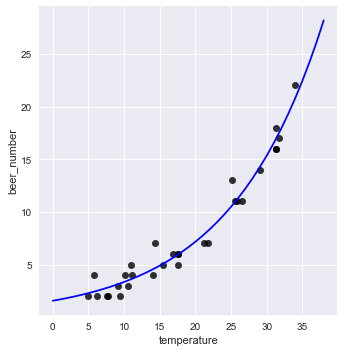

In [10]:
x_plot = np.arange(x_min - 5, x_max + 5)
pred = mod_pois.predict(pd.DataFrame({"temperature": x_plot}))

# 回帰直線を入れない　散布図
sns.lmplot(y="beer_number", x="temperature",
          data=beer, fit_reg=False, scatter_kws={"color":"black"})
plt.plot(x_plot, pred, color="blue")

In [11]:
# リンク関数が恒等関数出ない場合、回帰係数の解釈に注意が必要
# 対数関数の場合、回帰係数に対応する説明変数が1単位変わるごとに、〇〇倍となるという意味になる

In [12]:
# 気温が１度のときと、２度のときの販売個数の予測値の比

# 気温が1℃のときの販売個数の期待値
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# 気温が2℃のときの販売個数の期待値
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# 気温が1℃上昇すると販売個数は何倍になるか
pred_2 / pred_1

0    1.079045
dtype: float64